In [ ]:
!pip install wavencoder

# install torchaudio for audio dataset
!pip install torchaudio

In [ ]:
# import wavencoder models and trainer
from wavencoder.models import Wav2Vec, LSTM_Attn_Classifier
from wavencoder.trainer import train, test_evaluate_classifier, test_predict_classifier

# import torch modules and torchaudio for data
import torchaudio
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Dataset

import random
import IPython
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive/ASR_Project_Shared

/content/gdrive/.shortcut-targets-by-id/1dovc8A9Q0Yu-3j97BcX_N4CGIbnUfGMF/ASR_Project_Shared


In [ ]:
import os

ROOT_PATH='./drive/MyDrive/ASR_Project_Shared/'
relative_path = 'final_metadata/denoised/'

train_file = './final_metadata/denoised/train_metadata_speech{all_clap}_noise{all_clap+noiseclips}.csv'


test_file_1 = './final_metadata/denoised/test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.csv'

test_file_2 = './final_metadata/denoised/test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam} - test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam}.csv'


In [ ]:
import pandas as pd
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file_1)
train_df.head()

,file_path,label
0,./final_data/noiseBINgte2_denoised/Hindi_clips...,0
1,./final_data/denoised_all_clap_speech/Marathi/...,1
2,./final_data/denoised_all_clap_speech/Tamil/22...,1
3,./final_data/denoised_all_clap_speech/Hindi/26...,1
4,./final_data/denoised_all_clap_speech/Hindi/24...,1


In [ ]:
file_names = list(train_df['file_path'])

In [ ]:
wave=[]
for i in file_names:
  waveform, sample_rate = torchaudio.load(i)
  wave.append(waveform)

print(wave)

[tensor([[-8.4639e-06, -1.5855e-05,  8.3447e-06,  ..., -3.5763e-07,
         -4.7684e-07, -2.3842e-07]]), tensor([[-1.4684e-03, -4.3259e-03,  1.6971e-03,  ...,  3.5882e-05,
          6.5327e-05,  2.0075e-04]]), tensor([[-1.0031e-03, -3.2480e-03,  4.6372e-05,  ..., -8.8488e-03,
         -1.0650e-02, -1.1385e-02]]), tensor([[ 0.0002, -0.0040, -0.0017,  ...,  0.0028,  0.0035,  0.0039]]), tensor([[-0.0020, -0.0039,  0.0017,  ...,  0.0002,  0.0002,  0.0003]]), tensor([[-3.2997e-04, -8.0580e-04,  1.5745e-03,  ..., -2.0540e-04,
         -1.4234e-04, -2.1100e-05]]), tensor([[-1.4331e-02, -2.1090e-02, -1.7453e-02,  ..., -2.9922e-05,
         -1.5378e-05, -1.7023e-04]]), tensor([[-5.2869e-05, -9.8884e-05,  5.1975e-05,  ...,  1.0431e-05,
          1.8120e-05,  1.1504e-05]]), tensor([[-1.2390e-03, -3.1304e-03,  8.4466e-04,  ...,  1.3578e-04,
          1.3667e-04, -2.5630e-05]]), tensor([[-0.0030, -0.0080, -0.0040,  ...,  0.0007,  0.0138,  0.0129]]), tensor([[-8.6784e-05, -1.6224e-04,  8.5235e-05, 

In [ ]:
file_names1 = list(test_df['file_path'])

In [ ]:
wave1=[]
for i in file_names1:
  waveform, sample_rate = torchaudio.load(i)
  wave1.append(waveform)

print(wave1)

[tensor([[-0.0009, -0.0042,  0.0003,  ...,  0.0006,  0.0023,  0.0042]]), tensor([[-0.0072, -0.0178, -0.0166,  ...,  0.0004, -0.0002, -0.0009]]), tensor([[-2.6983e-03, -5.4451e-03, -3.5823e-03,  ...,  4.7624e-05,
          3.9756e-05, -1.0431e-05]]), tensor([[-5.3525e-04, -1.1133e-03,  1.0522e-03,  ...,  6.4731e-05,
          1.3471e-05, -3.9995e-05]]), tensor([[-0.0015, -0.0033,  0.0027,  ..., -0.1682, -0.1705, -0.1622]]), tensor([[ 0.0003,  0.0037,  0.0037,  ...,  0.0005,  0.0011, -0.0005]]), tensor([[-1.8790e-03, -1.0433e-03,  5.7710e-03,  ..., -2.4199e-05,
          1.0073e-05, -3.6299e-05]]), tensor([[-8.4043e-05, -1.9437e-04,  1.0473e-04,  ...,  3.0339e-05,
         -1.3113e-05, -4.1366e-05]]), tensor([[-0.0010, -0.0027,  0.0006,  ...,  0.0373,  0.0468,  0.0431]]), tensor([[ 7.3891e-03,  1.5966e-02,  1.8858e-02,  ...,  2.0851e-03,
         -7.9811e-05,  3.5179e-04]]), tensor([[-5.3691e-03, -9.5861e-03, -4.5354e-03,  ...,  3.6955e-05,
         -3.6746e-04,  1.0219e-03]]), tensor([[

In [ ]:
print(len(train_df))

4487


In [ ]:
print(len(test_df))

1026


In [ ]:
print(len(wave1))

1026


In [ ]:
print(wave[4486])

tensor([[-0.0010, -0.0020,  0.0015,  ..., -0.0009, -0.0011, -0.0010]])


In [ ]:
train_df['waveform'] = wave
test_df['waveform'] = wave1

In [ ]:
train_df.head()

,file_path,label,waveform
0,./final_data/noiseBINgte2_denoised/Hindi_clips...,0,"[[tensor(-8.4639e-06), tensor(-1.5855e-05), te..."
1,./final_data/denoised_all_clap_speech/Marathi/...,1,"[[tensor(-0.0015), tensor(-0.0043), tensor(0.0..."
2,./final_data/denoised_all_clap_speech/Tamil/22...,1,"[[tensor(-0.0010), tensor(-0.0032), tensor(4.6..."
3,./final_data/denoised_all_clap_speech/Hindi/26...,1,"[[tensor(0.0002), tensor(-0.0040), tensor(-0.0..."
4,./final_data/denoised_all_clap_speech/Hindi/24...,1,"[[tensor(-0.0020), tensor(-0.0039), tensor(0.0..."


In [ ]:
print(train_df['waveform'][10])

tensor([[-8.6784e-05, -1.6224e-04,  8.5235e-05,  ...,  1.3232e-05,
          2.1458e-05,  2.6286e-05]])


In [ ]:
data_train =[]
for i in range(0, len(train_df['waveform'])):
  x = train_df['waveform'][i]
  y = train_df['label'][i]
  data_train.append((x,y))

data_test =[]
for i in range(0, len(test_df['waveform'])):
  x = test_df['waveform'][i]
  y = test_df['label'][i]
  data_test.append((x,y))



In [ ]:
class SpeechDataset(Dataset):
    def __init__(self, dataset, transforms=None):
        self.dataset = dataset
        self.transforms = transforms
            
    def __len__(self):
        return len(self.dataset)    
    
    def pad_crop_wave(self, waveform, l):
        l_wave = waveform.shape[1]
        if l_wave > l:
            i=0
            waveform = waveform[:, i:i+l]
        elif l_wave < l:
            delta = l-l_wave
            if delta > l_wave:
                waveform = nn.ConstantPad1d((0, delta), 0)(waveform)
            else:
                waveform_new = torch.randn(waveform.shape[0], l)
                waveform_new[:, :l_wave] = waveform
                i=0
                waveform_new[:, l_wave:] = waveform[:, i:i+delta]
                waveform = waveform_new
        else:
            waveform = waveform
        return waveform

    def __getitem__(self,idx):
        waveform = self.dataset[idx][0]
        waveform = self.pad_crop_wave(waveform, l=16000)
        if self.transforms:
            waveform = self.transforms(waveform)
        label = self.dataset[idx][1]
        
        return waveform.squeeze(0), label

In [ ]:
audio_dataset = SpeechDataset(data_train)


In [ ]:
print(audio_dataset[0][0].shape)

torch.Size([16000])


In [ ]:
audio_testdata = SpeechDataset(data_test)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
import wavencoder

class AudioClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = wavencoder.models.Wav2Vec(pretrained=False)
        self.classifier = nn.Linear(512, 2)

    def forward(self, x):
        z = self.encoder(x)
        z = torch.mean(z, dim=2)
        out = self.classifier(z)
        return out

model = AudioClassifier()
print(model)

AudioClassifier(
  (encoder): Wav2Vec(
    (feature_extractor): ConvFeatureExtractionModel(
      (conv_layers): ModuleList(
        (0): Sequential(
          (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (1): Sequential(
          (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (2): Sequential(
          (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (3): Sequential(
          (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

In [ ]:
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=.0001, max_lr=.0001, step_size_up=10)


In [ ]:
train_len = int(len(audio_dataset) * 0.8)
val_len = len(audio_dataset) - train_len

train_ds, val_ds = random_split(audio_dataset, [train_len, val_len])
len(train_ds), len(val_ds)

(3589, 898)

In [ ]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
batch = next(iter(valloader))
x, y = batch

x.shape, y.shape

(torch.Size([32, 16000]), torch.Size([32]))

In [ ]:
model, train_dict = train(model, trainloader, valloader, n_epochs=50, optimizer=optimizer, scheduler=scheduler)


Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from inf to 0.246343, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 01
Train Loss = 0.5390	Train Acc = 0.6859100877192982
  Val Loss = 0.2463	  Val Acc = 0.9051724137931034



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.246343 to 0.244205, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 02
Train Loss = 0.2354	Train Acc = 0.8947916666666667
  Val Loss = 0.2442	  Val Acc = 0.896551724137931



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.244205 to 0.213889, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 03
Train Loss = 0.2001	Train Acc = 0.9117324561403509
  Val Loss = 0.2139	  Val Acc = 0.9094827586206896



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.213889 to 0.140809, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 04
Train Loss = 0.1518	Train Acc = 0.9364035087719298
  Val Loss = 0.1408	  Val Acc = 0.9428879310344828



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 05
Train Loss = 0.1773	Train Acc = 0.9300986842105263
  Val Loss = 0.1574	  Val Acc = 0.9364224137931034



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 06
Train Loss = 0.1406	Train Acc = 0.9413377192982456
  Val Loss = 0.1674	  Val Acc = 0.9385775862068966



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 07
Train Loss = 0.1311	Train Acc = 0.944078947368421
  Val Loss = 0.1520	  Val Acc = 0.9418103448275862



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.140809 to 0.133363, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 08
Train Loss = 0.1467	Train Acc = 0.9391995614035087
  Val Loss = 0.1334	  Val Acc = 0.9504310344827587



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 09
Train Loss = 0.1303	Train Acc = 0.9443530701754386
  Val Loss = 0.1366	  Val Acc = 0.9461206896551724



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.133363 to 0.110295, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 10
Train Loss = 0.1163	Train Acc = 0.9533991228070176
  Val Loss = 0.1103	  Val Acc = 0.9547413793103449



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.110295 to 0.106690, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 11
Train Loss = 0.1114	Train Acc = 0.9555921052631579
  Val Loss = 0.1067	  Val Acc = 0.959051724137931



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 12
Train Loss = 0.1153	Train Acc = 0.9533991228070176
  Val Loss = 0.1344	  Val Acc = 0.9536637931034483



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 13
Train Loss = 0.1123	Train Acc = 0.953125
  Val Loss = 0.1333	  Val Acc = 0.947198275862069



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 14
Train Loss = 0.1192	Train Acc = 0.9528508771929824
  Val Loss = 0.1245	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 15
Train Loss = 0.1162	Train Acc = 0.9523026315789473
  Val Loss = 0.1504	  Val Acc = 0.947198275862069



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 16
Train Loss = 0.1158	Train Acc = 0.9517543859649122
  Val Loss = 0.1846	  Val Acc = 0.9375



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 17
Train Loss = 0.1205	Train Acc = 0.953125
  Val Loss = 0.1697	  Val Acc = 0.9364224137931034



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 18
Train Loss = 0.1193	Train Acc = 0.9503837719298246
  Val Loss = 0.1412	  Val Acc = 0.9493534482758621



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 19
Train Loss = 0.1254	Train Acc = 0.9536732456140351
  Val Loss = 0.1397	  Val Acc = 0.947198275862069



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 20
Train Loss = 0.1291	Train Acc = 0.9517543859649122
  Val Loss = 0.1465	  Val Acc = 0.947198275862069



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 21
Train Loss = 0.1142	Train Acc = 0.9564144736842105
  Val Loss = 0.1156	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 22
Train Loss = 0.1149	Train Acc = 0.9542214912280702
  Val Loss = 0.1736	  Val Acc = 0.9256465517241379



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 23
Train Loss = 0.1139	Train Acc = 0.9569627192982456
  Val Loss = 0.1139	  Val Acc = 0.9536637931034483



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.106690 to 0.085296, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 24
Train Loss = 0.1017	Train Acc = 0.9608004385964912
  Val Loss = 0.0853	  Val Acc = 0.9622844827586207



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 25
Train Loss = 0.1095	Train Acc = 0.9572368421052632
  Val Loss = 0.1446	  Val Acc = 0.9439655172413793



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 26
Train Loss = 0.1015	Train Acc = 0.9588815789473685
  Val Loss = 0.0930	  Val Acc = 0.9655172413793104



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 27
Train Loss = 0.0924	Train Acc = 0.9646381578947368
  Val Loss = 0.0882	  Val Acc = 0.96875



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.085296 to 0.083007, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 28
Train Loss = 0.0908	Train Acc = 0.9643640350877193
  Val Loss = 0.0830	  Val Acc = 0.96875



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 29
Train Loss = 0.0897	Train Acc = 0.9643640350877193
  Val Loss = 0.1340	  Val Acc = 0.9450431034482759



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 30
Train Loss = 0.0902	Train Acc = 0.9643640350877193
  Val Loss = 0.1685	  Val Acc = 0.9375



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 31
Train Loss = 0.0873	Train Acc = 0.9668311403508771
  Val Loss = 0.0870	  Val Acc = 0.9676724137931034



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 32
Train Loss = 0.1157	Train Acc = 0.959484649122807
  Val Loss = 0.0916	  Val Acc = 0.959051724137931



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 33
Train Loss = 0.1100	Train Acc = 0.9616776315789474
  Val Loss = 0.1123	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 34
Train Loss = 0.1101	Train Acc = 0.9559758771929825
  Val Loss = 0.1055	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 35
Train Loss = 0.1442	Train Acc = 0.9451754385964912
  Val Loss = 0.0875	  Val Acc = 0.9665948275862069



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.083007 to 0.076573, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 36
Train Loss = 0.0841	Train Acc = 0.9679276315789473
  Val Loss = 0.0766	  Val Acc = 0.9698275862068966



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 37
Train Loss = 0.0780	Train Acc = 0.9677083333333333
  Val Loss = 0.1047	  Val Acc = 0.9655172413793104



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 38
Train Loss = 0.0927	Train Acc = 0.9668311403508771
  Val Loss = 0.0923	  Val Acc = 0.9655172413793104



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 39
Train Loss = 0.1098	Train Acc = 0.9588815789473685
  Val Loss = 0.1396	  Val Acc = 0.9461206896551724



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 40
Train Loss = 0.0930	Train Acc = 0.9616776315789474
  Val Loss = 0.0874	  Val Acc = 0.9633620689655172



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 41
Train Loss = 0.0854	Train Acc = 0.9665570175438597
  Val Loss = 0.0879	  Val Acc = 0.9676724137931034



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.076573 to 0.073139, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 42
Train Loss = 0.0824	Train Acc = 0.9690241228070176
  Val Loss = 0.0731	  Val Acc = 0.9730603448275862



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 43
Train Loss = 0.0902	Train Acc = 0.9646381578947368
  Val Loss = 0.1089	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 44
Train Loss = 0.1034	Train Acc = 0.9608552631578947
  Val Loss = 0.0870	  Val Acc = 0.9741379310344828



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 45
Train Loss = 0.1037	Train Acc = 0.9616228070175439
  Val Loss = 0.0807	  Val Acc = 0.96875



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 46
Train Loss = 0.0860	Train Acc = 0.9671052631578947
  Val Loss = 0.1003	  Val Acc = 0.9558189655172413



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.073139 to 0.062612, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 47
Train Loss = 0.0694	Train Acc = 0.9731359649122807
  Val Loss = 0.0626	  Val Acc = 0.9752155172413793



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 48
Train Loss = 0.0685	Train Acc = 0.9747807017543859
  Val Loss = 0.0748	  Val Acc = 0.9655172413793104



Train:   0%|          | 0/57 [00:00<?, ?it/s]

Updating lr to [0.0001]
Epoch : 49
Train Loss = 0.0660	Train Acc = 0.9756030701754386
  Val Loss = 0.1133	  Val Acc = 0.9633620689655172



Val  : 100%|██████████| 29/29 [00:03<00:00,  8.81it/s]

Updating lr to [0.0001]
Epoch : 50
Train Loss = 0.0695	Train Acc = 0.9747807017543859
  Val Loss = 0.0670	  Val Acc = 0.9773706896551724



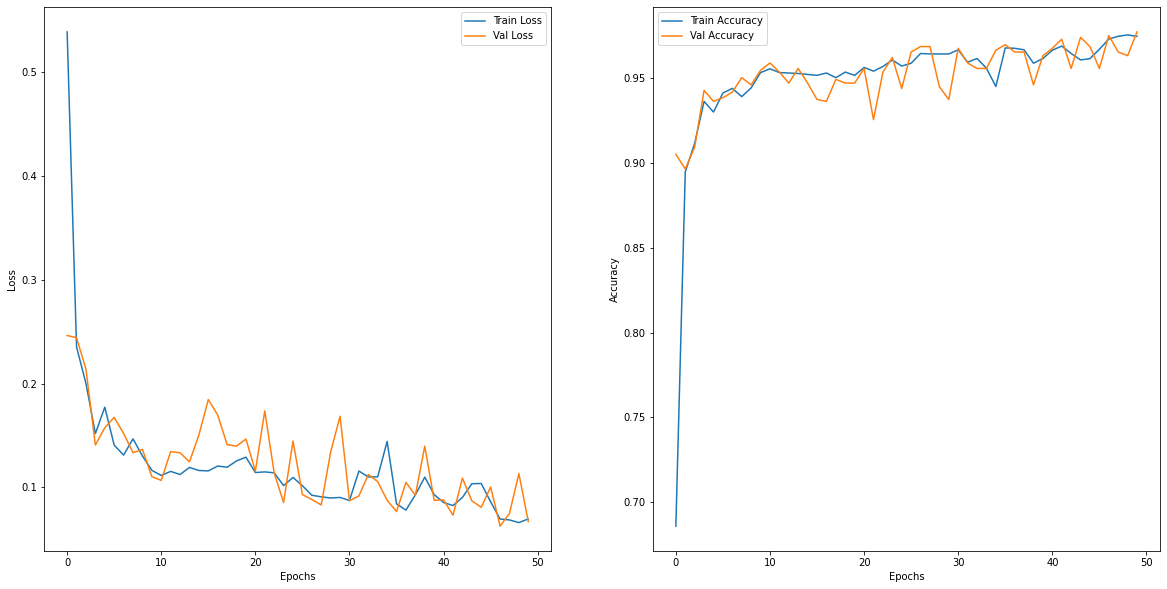

In [ ]:

train_losses = train_dict['train_losses']
train_accuracies = train_dict['train_accuracies']
val_losses = train_dict['val_losses']
val_accuracies = train_dict['val_Accuracies']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
testloader = torch.utils.data.DataLoader(audio_testdata, batch_size=32, shuffle=False)
test_evaluate_classifier(model, testloader)

100%|██████████| 33/33 [00:03<00:00,  8.78it/s]


{'test_acc': 0.7679924242424242, 'test_loss': 1.0467307377786546}

In [ ]:
test_df = pd.read_csv(test_file_2)


In [ ]:
file_names = list(test_df['file_path'])
wave2=[]
for i in file_names:
  waveform, sample_rate = torchaudio.load(i)
  wave2.append(waveform)

print(wave2)

[tensor([[-3.7348e-04, -6.9839e-04,  3.6693e-04,  ...,  5.6982e-05,
          4.6253e-05,  6.6757e-05]]), tensor([[-0.0005,  0.0005,  0.0013,  ...,  0.0014,  0.0014,  0.0014]]), tensor([[-3.3736e-05, -6.3121e-05,  3.3140e-05,  ..., -4.3511e-06,
         -4.2319e-06, -3.5763e-06]]), tensor([[-1.4099e-03, -3.5042e-03,  3.7092e-04,  ..., -2.1040e-05,
          1.6868e-05,  1.1027e-05]]), tensor([[-0.0021, -0.0037,  0.0046,  ..., -0.0931,  0.0108,  0.0246]]), tensor([[-2.0621e-03, -4.2069e-03,  3.2905e-03,  ..., -6.3539e-05,
          8.8096e-05,  4.5675e-04]]), tensor([[-0.0009, -0.0027,  0.0067,  ...,  0.0365,  0.0246,  0.0129]]), tensor([[-0.0013, -0.0034,  0.0011,  ...,  0.0014, -0.0004, -0.0033]]), tensor([[-9.7811e-05, -1.8293e-04,  9.6083e-05,  ..., -7.3791e-05,
         -6.5088e-05, -5.7280e-05]]), tensor([[1.1583e-02, 3.3162e-02, 4.7543e-02,  ..., 1.3578e-04, 7.8022e-05,
         9.1791e-05]]), tensor([[-0.0006, -0.0010,  0.0005,  ..., -0.0021, -0.0023, -0.0034]]), tensor([[-5.620

In [ ]:
test_df['waveform'] = wave2
data_test =[]
for i in range(0, len(test_df['waveform'])):
  x = test_df['waveform'][i]
  y = test_df['label'][i]
  data_test.append((x,y))

In [ ]:
audio_test2 = SpeechDataset(data_test)

In [ ]:
testloader = torch.utils.data.DataLoader(audio_test2, batch_size=32, shuffle=False)
test_evaluate_classifier(model, testloader)

100%|██████████| 47/47 [00:05<00:00,  8.45it/s]


{'test_acc': 0.7319148936170212, 'test_loss': 1.2810944864090452}

In [ ]:
print(testloader)